In [ ]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [ ]:
songs_df = pd.read_csv("/content/phase2_data.csv", index_col=0, sep="\t")

In [ ]:
songs_df

In [ ]:
songs_df.dtypes

In [ ]:
songs_df.columns

In [ ]:
categorical_columns = [
    'song_type',
    'artist_type',
    'main_genre',
]

acoustic_categorical_columns = [
    'key',
    'mode',
    'time_signature'
]

time_cols = [
    'year'
]

bool_cols = [
    'explicit',
    'is_pop_artist',
]

other_num_columns = [
    'popularity_artist',
    'followers',
    "year_end_score"
]

acoustic_features = [
    'duration_ms',
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'valence',
    'tempo'
]

predict_col = "rank_score"


In [ ]:
songs_df[categorical_columns + acoustic_categorical_columns + bool_cols + acoustic_features + [predict_col]].describe()

,key,mode,time_signature,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,rank_score
count,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000
mean,5.225302,0.726969,3.943540,228937.153831,0.265285,0.600397,0.625057,0.047376,0.192171,-8.843792,0.067522,0.607838,120.313258,24.299666
std,3.566917,0.445527,0.289292,62968.659993,0.264401,0.150586,0.197107,0.168151,0.163649,3.591486,0.074343,0.236471,27.690074,22.473497
min,0.000000,0.000000,0.000000,24604.000000,0.000001,0.000000,0.006640,0.000000,0.013000,-30.896000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,186446.750000,0.039300,0.502000,0.481000,0.000000,0.088300,-11.216500,0.031800,0.427000,99.707750,5.000000
50%,5.000000,1.000000,4.000000,222940.000000,0.170000,0.608000,0.640000,0.000010,0.129000,-8.471000,0.040400,0.632000,118.951000,15.000000
75%,8.000000,1.000000,4.000000,259529.750000,0.440000,0.706000,0.783000,0.001100,0.248750,-6.051000,0.063000,0.804000,135.902250,44.000000
max,11.000000,1.000000,5.000000,744867.000000,0.995000,0.988000,0.998000,0.985000,0.997000,3.440000,0.950000,1.000000,231.028000,100.000000


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load data
data = songs_df[ categorical_columns + acoustic_categorical_columns + acoustic_features + [predict_col]]
data["rank_score"]= [ 1 if i >= 50 else 0 for i in data.rank_score]

# Encode categorical columns using label encoding
le = LabelEncoder()
for col in categorical_columns :
    data[col] = le.fit_transform(data[col])

for col in acoustic_categorical_columns :
    data[col] = le.fit_transform(data[col])

# # One-hot encode categorical columns (if preferred over label encoding)
data = pd.get_dummies(data, columns=categorical_columns)
data = pd.get_dummies(data, columns=acoustic_categorical_columns)

# # data[other_num_columns] = data[other_num_columns].fillna(data[other_num_columns].mean())
# # # data[predict_col] = data[predict_col].fillna(data[predict_col].mean())

# Standardize numeric columns
scaler = StandardScaler()
# data[other_num_columns + acoustic_features] = scaler.fit_transform(data[other_num_columns + acoustic_features])
data[acoustic_features] = scaler.fit_transform(data[acoustic_features])


In [ ]:
# Split data into train and test sets

X = data.drop(predict_col, axis=1)
y = data[predict_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Build logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate model
from sklearn.metrics import accuracy_score
y_pred_logreg = clf.predict(X_test)


print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, zero_division=0))


Logistic Regression Results:
Accuracy: 0.7833551340745586
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      4781
           1       0.53      0.08      0.14      1335

    accuracy                           0.78      6116
   macro avg       0.66      0.53      0.51      6116
weighted avg       0.73      0.78      0.71      6116



# Logistic Regression - Visualization

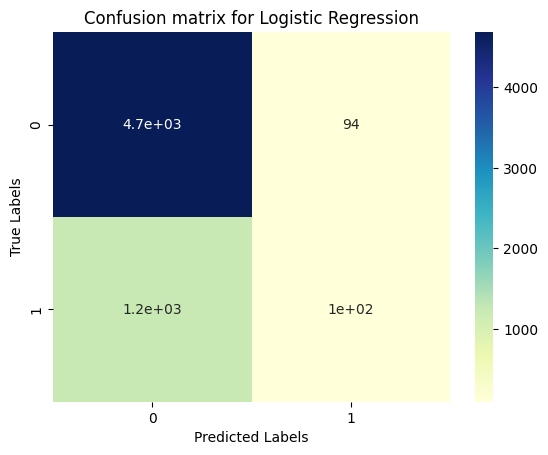

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, cmap="YlGnBu")
plt.title("Confusion matrix for Logistic Regression")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Neural Network For Binary Classification

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np

# Split data into train and test sets
X = data.drop(predict_col, axis=1).values.astype(np.float32)
y = data[predict_col].values.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
510/510 [==============================] - 2s 3ms/step - loss: 0.4939 - accuracy: 0.7815 - val_loss: 0.4785 - val_accuracy: 0.7845
Epoch 2/30
510/510 [==============================] - 1s 3ms/step - loss: 0.4673 - accuracy: 0.7900 - val_loss: 0.4732 - val_accuracy: 0.7845
Epoch 3/30
510/510 [==============================] - 1s 2ms/step - loss: 0.4563 - accuracy: 0.7913 - val_loss: 0.4740 - val_accuracy: 0.7879
Epoch 4/30
510/510 [==============================] - 2s 3ms/step - loss: 0.4476 - accuracy: 0.7932 - val_loss: 0.4721 - val_accuracy: 0.7886
Epoch 5/30
510/510 [==============================] - 2s 4ms/step - loss: 0.4368 - accuracy: 0.7972 - val_loss: 0.4790 - val_accuracy: 0.7808
Epoch 6/30
510/510 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.8032 - val_loss: 0.4854 - val_accuracy: 0.7793
Epoch 7/30
510/510 [==============================] - 1s 2ms/step - loss: 0.4184 - accuracy: 0.8053 - val_loss: 0.4880 - val_accuracy: 0.7795
Epoch 

In [ ]:
# Evaluate model
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

128/128 [==============================] - 0s 2ms/step - loss: 0.7242 - accuracy: 0.7455
Accuracy: 0.745463490486145


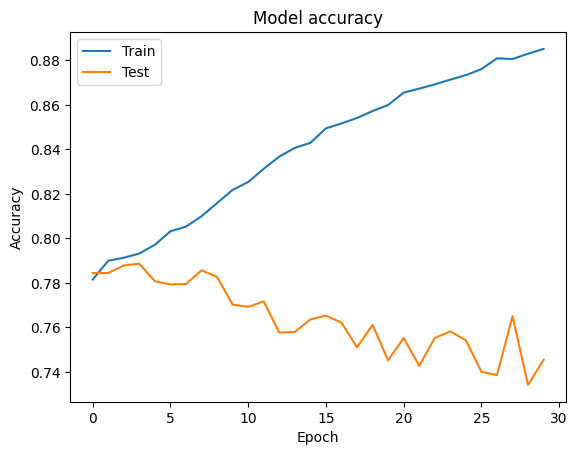

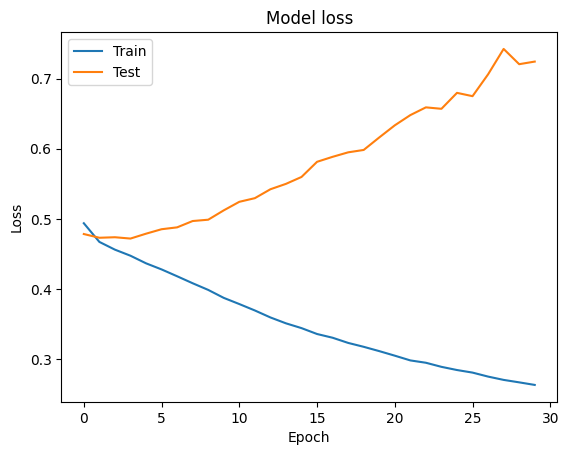

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Neural Network With L2 Regularization

In [ ]:
from keras import regularizers

# Split data into train and test sets
X = data.drop(predict_col, axis=1).values.astype(np.float32)
y = data[predict_col].values.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

historyl2 = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)


Epoch 1/30
510/510 [==============================] - 2s 3ms/step - loss: 0.6738 - accuracy: 0.7843 - val_loss: 0.5214 - val_accuracy: 0.7810
Epoch 2/30
510/510 [==============================] - 1s 2ms/step - loss: 0.5105 - accuracy: 0.7854 - val_loss: 0.5165 - val_accuracy: 0.7810
Epoch 3/30
510/510 [==============================] - 1s 3ms/step - loss: 0.5072 - accuracy: 0.7854 - val_loss: 0.5122 - val_accuracy: 0.7810
Epoch 4/30
510/510 [==============================] - 1s 2ms/step - loss: 0.5050 - accuracy: 0.7854 - val_loss: 0.5109 - val_accuracy: 0.7810
Epoch 5/30
510/510 [==============================] - 1s 2ms/step - loss: 0.5041 - accuracy: 0.7854 - val_loss: 0.5080 - val_accuracy: 0.7810
Epoch 6/30
510/510 [==============================] - 1s 3ms/step - loss: 0.5022 - accuracy: 0.7854 - val_loss: 0.5054 - val_accuracy: 0.7810
Epoch 7/30
510/510 [==============================] - 2s 3ms/step - loss: 0.5007 - accuracy: 0.7856 - val_loss: 0.5072 - val_accuracy: 0.7822
Epoch 

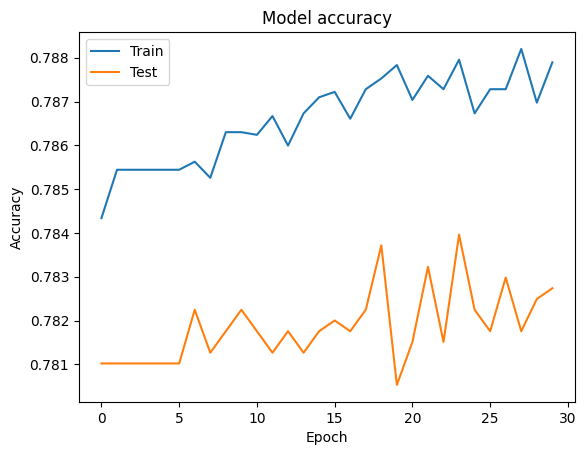

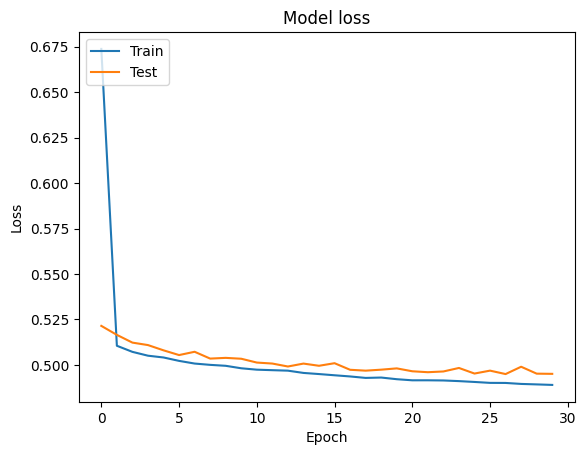

In [ ]:
import matplotlib.pyplot as plt

history = historyl2

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Fit Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on test set and evaluate model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7854340362923001


In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88      3185
         1.0       0.60      0.06      0.11       893

    accuracy                           0.79      4078
   macro avg       0.69      0.52      0.49      4078
weighted avg       0.75      0.79      0.71      4078



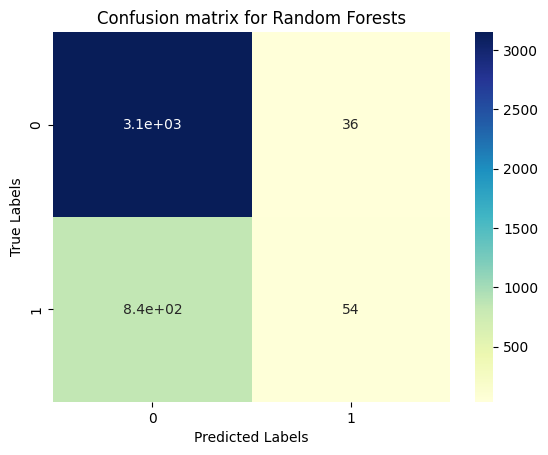

In [103]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.title("Confusion matrix for Random Forests")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#KMeans

In [112]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Fit the KMeans model
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

KMeans(n_clusters=3)

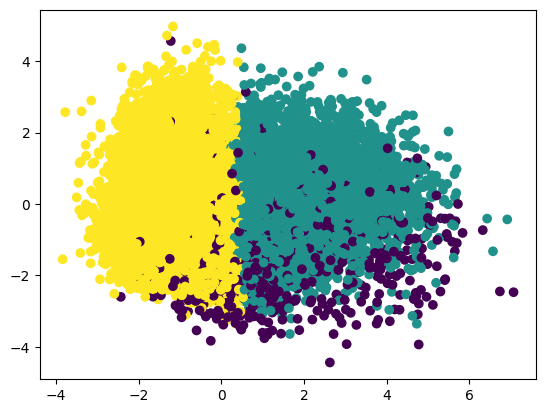

In [113]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters in the reduced space using scatter plots
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.show()

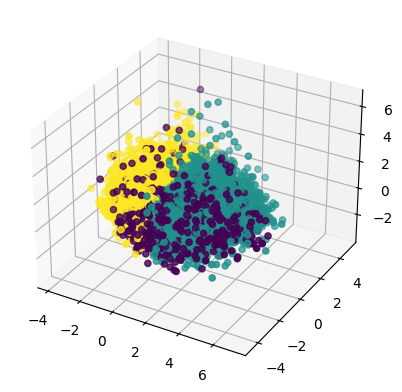

In [114]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Plot the clusters in the reduced space using a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_)
plt.show()

In [115]:
X_pca

array([[-0.44583598, -0.09282134,  0.39745536],
       [ 0.01472131, -0.39251247, -0.17052954],
       [-2.3993385 ,  0.13896625,  1.5537188 ],
       ...,
       [ 0.04498821,  0.44322395, -0.9141256 ],
       [ 1.0562973 ,  0.894728  , -0.5728659 ],
       [-1.7144548 ,  0.861022  ,  0.03777983]], dtype=float32)

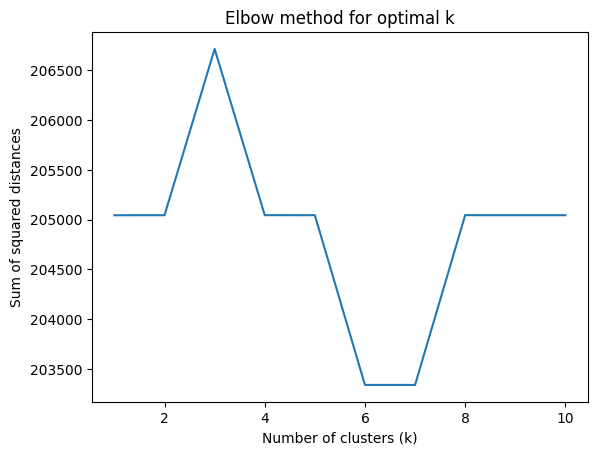

In [108]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sse = []
# Fit the KMeans model
num_clusters = 4
for nn in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k')
plt.show()

#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

svm = SVC()
svm.fit(X_train, y_train)

# Evaluate model on test set
y_pred_svm = svm.predict(X_test)
score = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", score)

SVM Results:
Accuracy: 0.7869053457577244
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88      3185
         1.0       0.68      0.05      0.09       893

    accuracy                           0.79      4078
   macro avg       0.74      0.52      0.49      4078
weighted avg       0.77      0.79      0.71      4078



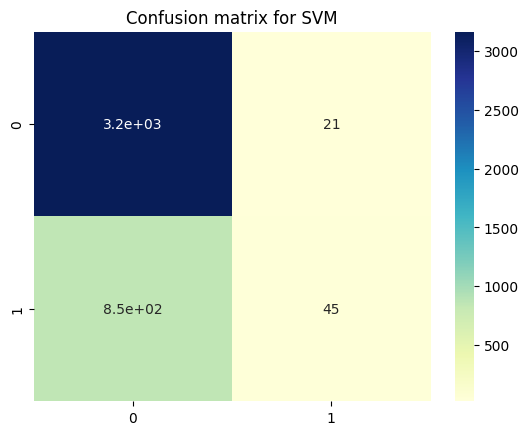

In [106]:
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap="YlGnBu")
plt.title("Confusion matrix for SVM")
plt.show()

In [116]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Calculate WCSS and Silhouette score
wcss = kmeans.inertia_
silhouette_avg = silhouette_score(X, kmeans.labels_)

# Print the metrics
print("WCSS:", wcss)
print("Silhouette Score:", silhouette_avg)

WCSS: 218232.875
Silhouette Score: 0.14192224
